# Digital Music Shop database -SQL

### The Chinook database contains information about a fictional digital music shop with eleven tables. Think of the database like a small iTunes store.The Chinook database contains information about the artists, songs, genre of music, playlist, albums, store's employees, customers, and the invoice. [Click here to download the sample data](https://github.com/lerocha/chinook-database)

### For easier viewing, below is the database schema


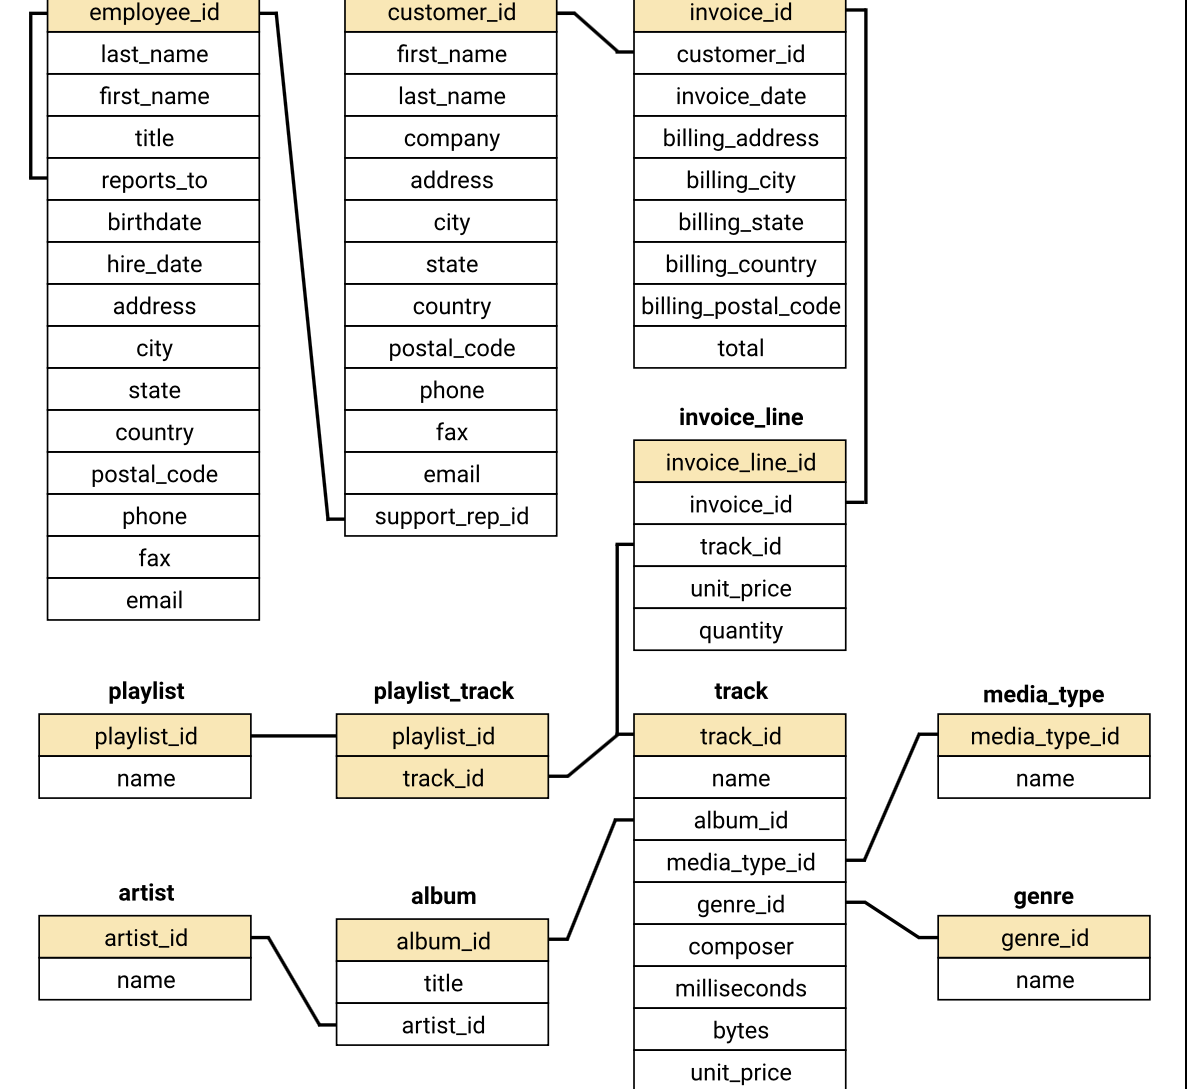

In [1]:
import pandas as pd
import sqlite3

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [3]:
%%sql
select
    name,
    type
from sqlite_master
where type in ("table","view")

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


## Task one : For a single track bought, we would like to know the
- id of the track
- name of the track
- name of media type of the track
- price paid by customers for the track
- quantity bought by customers for the track

In [4]:
%%sql
select
    il.track_id,
    t.name as track_name,
    mt.name as track_type,
    il.unit_price,
    il.quantity
from invoice_line il
inner join track t on t.track_id = il.track_id
inner join media_type mt on mt.media_type_id = t.media_type_id
where il.invoice_id = 4 

 * sqlite:///chinook.db
Done.


track_id,track_name,track_type,unit_price,quantity
3448,"Lamentations of Jeremiah, First Set \ Incipit Lamentatio",Protected AAC audio file,0.99,1
2560,Violent Pornography,MPEG audio file,0.99,1
3336,War Pigs,Purchased AAC audio file,0.99,1
829,Let's Get Rocked,MPEG audio file,0.99,1
1872,Attitude,MPEG audio file,0.99,1
748,Dealer,MPEG audio file,0.99,1
1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
2514,Spoonman,MPEG audio file,0.99,1


## Task two : Top 5 albums which purchased by customers, sort from most track purchased to least tracks purchased ( invoice_line table contains each individual song from each customer purchase)

In [6]:
%%sql       
select
    temp.title album_title,
    temp.name artist_name,
    count(*) as number_of_tracks_purchased_from_album
from invoice_line il 
inner join (select 
                t.track_id,
                al.title ,
                ar.name  
            from track t
            inner join album al on al.album_id=t.album_id
            inner join artist ar on ar.artist_id=al.artist_id) as temp
on il.track_id = temp.track_id

group by 1, 2
order by 3 desc 
limit 5

 * sqlite:///chinook.db
Done.


album_title,artist_name,number_of_tracks_purchased_from_album
Are You Experienced?,Jimi Hendrix,187
Faceless,Godsmack,96
Mezmerize,System Of A Down,93
Get Born,JET,90
The Doors,The Doors,83


## Task three: Categorize customers into different category based on customer's total purchases 
- small spender : If the customer's total purchases are less than 40
- big spender : If the customer's total purchases are greater than 100
- regular : If the customer's total purchases are between 40 and 100 (inclusive)

In [7]:
%%sql  
select
    c.first_name ||" "|| c.last_name as customer_name, 
    count(i.invoice_id)as number_of_purchases,
    sum(i.total) as total_spent_per_customers,
    case 
        when sum(i.total) < 40 then 'small spender'
        when sum(i.total) > 100 then 'big spender'
        else 'regular'
        end as customer_category

from customer c
inner join invoice i on i.customer_id=c.customer_id
group by 1
order by 1
limit 10

 * sqlite:///chinook.db
Done.


customer_name,number_of_purchases,total_spent_per_customers,customer_category
Aaron Mitchell,8,70.28999999999999,regular
Alexandre Rocha,10,69.3,regular
Astrid Gruber,9,69.3,regular
Bjørn Hansen,9,72.27000000000001,regular
Camille Bernard,9,79.2,regular
Daan Peeters,7,60.38999999999999,regular
Dan Miller,12,95.03999999999999,regular
Diego Gutiérrez,5,39.6,small spender
Dominique Lefebvre,9,72.27,regular
Eduardo Martins,12,60.39,regular


## Task four: Summary data of all playlist in the database, containing the unique id of playlist, name of playlist, number of tracks in playlist, sum of length of the playlist in seconds

In [8]:
%%sql  
with cte as(
    select 
        p.playlist_id,
        p.name as playlist_name,
        t.name as track_name,
        (t.milliseconds/1000) as length_in_seconds
    from playlist p
    left join playlist_track pt on pt.playlist_id=p.playlist_id
    left join track t on t.track_id=pt.track_id
    )

select 
        playlist_id,
        playlist_name,
        count(track_name)as number_of_tracks_in_playlist,
        sum(length_in_seconds) as sum_length_of_playlist
from cte
group by 1,2
order by 1 

 * sqlite:///chinook.db
Done.


playlist_id,playlist_name,number_of_tracks_in_playlist,sum_length_of_playlist
1,Music,3290,876049
2,Movies,0,None
3,TV Shows,213,500987
4,Audiobooks,0,None
5,90’s Music,1477,397970
6,Audiobooks,0,None
7,Movies,0,None
8,Music,3290,876049
9,Music Videos,1,294
10,TV Shows,213,500987


## Task five: Which genres sell the most tracks in the USA in percentages ?

In [9]:
%%sql  
with cte_usa_tracks_purchased as
(
    select il.* 
    from invoice_line il
    inner join invoice i on i.invoice_id=il.invoice_id
    inner join customer c on c.customer_id=i.customer_id
    where c.country = 'USA'
)
select 
    g.name as genre,
    count(cte.invoice_line_id)as number_of_tracks_sold,
    cast (count(cte.invoice_line_id)as float) /(select count(*) from cte_usa_tracks_purchased)as percentage
         
from cte_usa_tracks_purchased cte
inner join track t on t.track_id=cte.track_id
inner join genre g on g.genre_id=t.genre_id
group by 1
order by 2 desc
limit 5
-- Recommendation: Rock genre accounts for 53% of sales in the USA.

 * sqlite:///chinook.db
Done.


genre,number_of_tracks_sold,percentage
Rock,561,0.5337773549000951
Alternative & Punk,130,0.12369172216936251
Metal,124,0.11798287345385347
R&B/Soul,53,0.05042816365366318
Blues,36,0.03425309229305423


## Task six: Each customer gets a customer support sales representative when they make a purchase.Analyze the employees' sales performance based on purchases of customers belonging to each employee

In [10]:
%%sql  
with cte_customer_support as
(
    select
        i.customer_id,
        c.support_rep_id,
        sum(i.total) AS TOTAL
    from customer c
    inner join invoice i on c.customer_id=i.customer_id
    group by 1,2
 )
select
    e.first_name ||" " || e.last_name as employee_name,
    e.title,
    e.hire_date,
    sum(cte.total) AS total_sales
    
from cte_customer_support as cte
inner join employee e on e.employee_id=cte.support_rep_id
group by 1
order by 4 desc
--can do select all for cte

 * sqlite:///chinook.db
Done.


employee_name,title,hire_date,total_sales
Jane Peacock,Sales Support Agent,2017-04-01 00:00:00,1731.5099999999998
Margaret Park,Sales Support Agent,2017-05-03 00:00:00,1584.0000000000002
Steve Johnson,Sales Support Agent,2017-10-17 00:00:00,1393.92
